In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE



In [15]:
# Step 1: Load data
df = pd.read_csv('/content/creditcard.csv')

In [16]:
# Step 2: Handle missing values
df = df.dropna(subset=['Class'])  # Drop rows with NaN in target
df = df.dropna()  # (Optional) Drop rows with NaN in any column


In [17]:
# Step 3: Feature scaling for 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

In [18]:
# Step 4: Split into features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [19]:
# Step 5: Train-test split (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
# Step 6: Handle imbalance with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [21]:
# Step 7: Train model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [22]:
# Step 8: Predict and evaluate
y_pred = model.predict(X_test)

In [23]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Confusion Matrix:


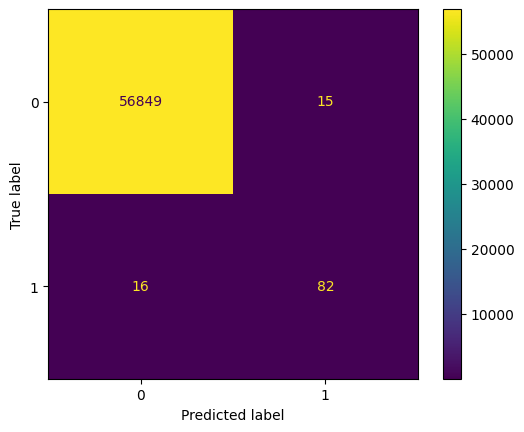

In [24]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()